In [ ]:
pip install opendatasets

In [ ]:
pip install pandas

In [ ]:
import numpy as np

In [ ]:
import opendatasets as od

In [ ]:

od.download(
    "https://www.kaggle.com/datasets/vikramtiwari/mnist-numpy")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: debangighosh
Your Kaggle Key: ··········


100%|██████████| 11.0M/11.0M [00:00<00:00, 61.3MB/s]

In [ ]:
data = np.load('./mnist-numpy/mnist.npz')

In [ ]:
data

In [ ]:
X_train = data['x_train']
y_train = data['y_train']
X_test = data['x_test']
y_test = data['y_test']


# # Split the dataset into training and testing sets
# X_train, X_val = X_train[:55000], X_train[55000:]
# y_train, y_val = y_train[:55000], y_train[55000:]

In [ ]:
X_train[0].shape

(28, 28)

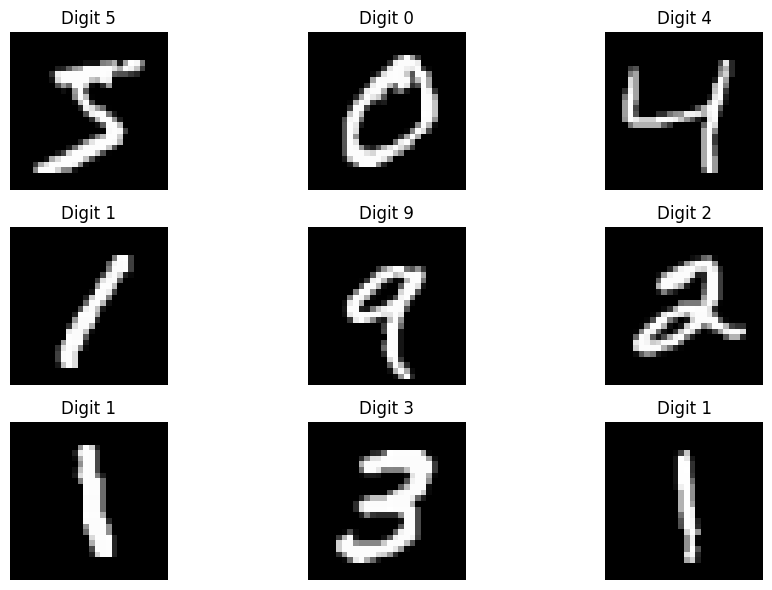

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
for i in range(9):
  plt.subplot(3, 3, i + 1)
  plt.imshow(X_train[i], cmap='gray')
  plt.axis('off')
  plt.title('Digit {}'.format(y_train[i]))
plt.tight_layout()
plt.show()

# Reshape the data to have shape (num_images, height * width)
X_train = X_train.reshape((X_train.shape[0], 28 * 28))
X_test = X_test.reshape((X_test.shape[0], 28 * 28))


In [ ]:
X_train.shape[0]

60000

In [ ]:
import tensorflow as tf


In [ ]:
X_train = tf.convert_to_tensor(X_train)
X_test = tf.convert_to_tensor(X_test)


In [ ]:
X_train = tf.reshape(X_train, [-1, 28, 28, 1])

In [ ]:
X_train

<tf.Tensor: shape=(60000, 28, 28, 1), dtype=uint8, numpy=
array([[[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]]],


       [[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0]

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds

# Define the Focal Loss function
def focal_loss(y_true, y_pred, gamma=2.0, alpha=0.25):
    # Compute the binary cross-entropy loss
    binary_cross_entropy = tf.losses.binary_crossentropy(y_true, y_pred, from_logits=False)

    # Calculate the modulating factor
    p_t = tf.math.exp(-binary_cross_entropy)
    focal_loss = (alpha) * (1 - p_t) ** (gamma) * binary_cross_entropy

    return focal_loss

In [ ]:
# Load the MNIST dataset
dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))

# Apply the preprocessing transformations to the dataset
dataset = dataset.map(lambda x, y: (tf.image.convert_image_dtype(x, tf.float32), tf.one_hot(y, depth=10)))

# Shuffle, batch, and prefetch the dataset
dataset = dataset.shuffle(buffer_size=60000).batch(64).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compiling the model with the Focal Loss
model.compile(optimizer='adam', loss=focal_loss, metrics=['accuracy'])

# Training the model
history_prebuilt=model.fit(dataset, epochs=10)


Epoch 1/10
938/938 [==============================] - 9s 6ms/step - loss: 0.0012 - accuracy: 0.8843
Epoch 2/10
938/938 [==============================] - 7s 5ms/step - loss: 3.9995e-04 - accuracy: 0.9425
Epoch 3/10
938/938 [==============================] - 8s 5ms/step - loss: 2.6446e-04 - accuracy: 0.9575
Epoch 4/10
938/938 [==============================] - 8s 6ms/step - loss: 1.9364e-04 - accuracy: 0.9658
Epoch 5/10
938/938 [==============================] - 7s 5ms/step - loss: 1.4986e-04 - accuracy: 0.9719
Epoch 6/10
938/938 [==============================] - 7s 5ms/step - loss: 1.1698e-04 - accuracy: 0.9770
Epoch 7/10
938/938 [==============================] - 8s 5ms/step - loss: 9.4236e-05 - accuracy: 0.9809
Epoch 8/10
938/938 [==============================] - 8s 6ms/step - loss: 7.5462e-05 - accuracy: 0.9844
Epoch 9/10
938/938 [==============================] - 7s 5ms/step - loss: 6.0452e-05 - accuracy: 0.9879
Epoch 10/10
938/938 [==============================] - 7s 5ms/step -

In [ ]:
X_test = tf.reshape(X_test, [-1, 28, 28, 1])

In [ ]:
# # Evaluating the model
# mnist_test = tfds.load('mnist', split="test", as_supervised=True)
# mnist_test = mnist_test.map(lambda x, y: (tf.image.convert_image_dtype(x, tf.float32), tf.one_hot(y, depth=10)))
# mnist_test = mnist_test.batch(64).prefetch(buffer_size=tf.data.AUTOTUNE)

# Load the MNIST dataset from google for handwritten digits recognisition
dataset_test = tf.data.Dataset.from_tensor_slices((X_test, y_test))

# Apply the preprocessing transformations to the dataset
dataset_test = dataset_test.map(lambda x, y: (tf.image.convert_image_dtype(x, tf.float32), tf.one_hot(y, depth=10)))

# Shuffle, batch, and prefetch the dataset
dataset_test = dataset_test.batch(64).prefetch(buffer_size=tf.data.AUTOTUNE)

loss, accuracy = model.evaluate(dataset_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")
if loss<0.1:
  print("Loss is very low tending to 0 and so is a good fit to the model")


157/157 [==============================] - 1s 4ms/step - loss: 2.0939e-04 - accuracy: 0.9748
Test Loss: 0.00020938832312822342, Test Accuracy: 0.9747999906539917
Loss is very low tending to 0 and so is a good fit to the model


## **Bringing up some changes to the focal loss function:**

# Changes:
1.   **The factor k can be multiplied to give an weightage to binary cross entropy while calculating the modulating factor input which decreases the loss.**

2.   **We can use gamma^n instead of gamma as increase in gamma can increase down-weighting such that the easy examples are down-weighted more than the hard ones.**

3.  **We can additionally normalise the loss function by dividing it by the number of positive samples. This can help stabilize the loss during training.**

4. **We can use dynamic value of alpha everytime with training examples based on if Y_pred>0.5 or <= 0.5**

In [ ]:
# Define the Focal Loss function
def focal_lossnew(y_true, y_pred, gamma=2.0, alpha=0.25,k=15,n=2,epsilon=1e-7):
    # Compute the binary cross-entropy loss
    binary_cross_entropy = tf.losses.binary_crossentropy(y_true, y_pred, from_logits=False)

    # Calculate the modulating factor
    #p_t = tf.math.exp(-binary_cross_entropy)
    p_t = tf.math.exp(k*(-binary_cross_entropy))
    '''The factor k can be multiplied to give an weightage to
    binary cross entropy input which increases the modulating factor.'''
    #Modified focal loss
    focal_loss = (alpha) * (1 - p_t) ** (gamma**n) * binary_cross_entropy
    '''Original focal loss function can be modified
    using these above changes'''

    # We can additionally normalise the loss function for lowering the loss
    #A method called regularization.
    num_positive_samples = tf.reduce_sum(y_true) + epsilon
    focal_loss = focal_loss / num_positive_samples

    return focal_loss

In [ ]:
# Load the MNIST dataset from google for handwritten digits recognisition
dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))

# Apply the preprocessing transformations to the dataset
dataset = dataset.map(lambda x, y: (tf.image.convert_image_dtype(x, tf.float32), tf.one_hot(y, depth=10)))

# Shuffle, batch, and prefetch the dataset
dataset = dataset.shuffle(buffer_size=60000).batch(64).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compiling the model with the Focal Loss
model.compile(optimizer='adam', loss=focal_lossnew, metrics=['accuracy'])

# Training the model
history_custom=model.fit(dataset, epochs=11)

Epoch 1/11
938/938 [==============================] - 11s 7ms/step - loss: 1.5009e-04 - accuracy: 0.9160
Epoch 2/11
938/938 [==============================] - 10s 8ms/step - loss: 4.6599e-05 - accuracy: 0.9700
Epoch 3/11
938/938 [==============================] - 10s 8ms/step - loss: 3.0594e-05 - accuracy: 0.9804
Epoch 4/11
938/938 [==============================] - 10s 8ms/step - loss: 2.1246e-05 - accuracy: 0.9862
Epoch 5/11
938/938 [==============================] - 9s 7ms/step - loss: 1.6123e-05 - accuracy: 0.9894
Epoch 6/11
938/938 [==============================] - 9s 7ms/step - loss: 1.2817e-05 - accuracy: 0.9921
Epoch 7/11
938/938 [==============================] - 10s 8ms/step - loss: 9.9500e-06 - accuracy: 0.9937
Epoch 8/11
938/938 [==============================] - 10s 8ms/step - loss: 8.0458e-06 - accuracy: 0.9947
Epoch 9/11
938/938 [==============================] - 8s 7ms/step - loss: 6.2262e-06 - accuracy: 0.9961
Epoch 10/11
938/938 [==============================] - 9s 

In [ ]:
# # Evaluating the model
# mnist_test = tfds.load('mnist', split="test", as_supervised=True)
# mnist_test = mnist_test.map(lambda x, y: (tf.image.convert_image_dtype(x, tf.float32), tf.one_hot(y, depth=10)))
# mnist_test = mnist_test.batch(64).prefetch(buffer_size=tf.data.AUTOTUNE)

# Load the MNIST dataset from google for handwritten digits recognisition
dataset_test = tf.data.Dataset.from_tensor_slices((X_test, y_test))

# Apply the preprocessing transformations to the dataset
dataset_test = dataset_test.map(lambda x, y: (tf.image.convert_image_dtype(x, tf.float32), tf.one_hot(y, depth=10)))

# Shuffle, batch, and prefetch the dataset
dataset_test = dataset_test.batch(64).prefetch(buffer_size=tf.data.AUTOTUNE)

loss, accuracy = model.evaluate(dataset_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")
if loss<0.1:
  print("Loss is very low tending to 0 and so is a good fit to the model")

157/157 [==============================] - 1s 5ms/step - loss: 3.1500e-05 - accuracy: 0.9810
Test Loss: 3.1499628676101565e-05, Test Accuracy: 0.9810000061988831
Loss is very low tending to 0 and so is a good fit to the model


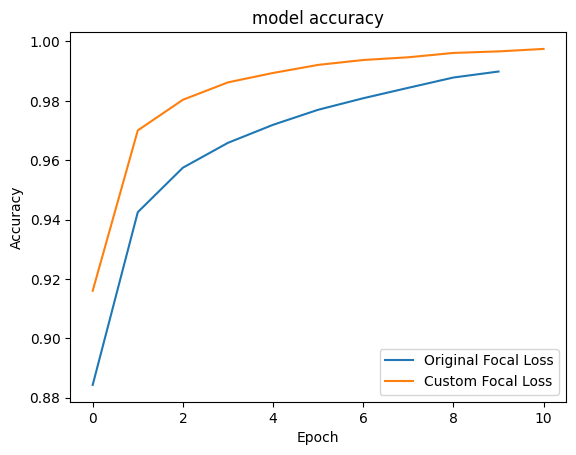

In [ ]:
plt.plot(history_prebuilt.history['accuracy'])
plt.plot(history_custom.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Original Focal Loss', 'Custom Focal Loss'], loc='lower right')
plt.show()

## **USING THE ABOVE MODIFIED FOCAL LOSS FUNCTION WITH A DYNAMIC VALUE OF ALPHA**
We could use a dynamic value of gamma even, but according to a research paper value of gamma close to 2 fits the best.

In [ ]:
# Define the Focal Loss function
def focal_lossnew2(y_true, y_pred, gamma=2.0, k=15,n=2,epsilon=1e-7):
    # Compute the binary cross-entropy loss
    binary_cross_entropy = tf.losses.binary_crossentropy(y_true, y_pred, from_logits=False)
    #tf.debugging.assert_shapes([(y_true, ["batch", 10]), (y_pred, ["batch", 10])])
    # Calculate the modulating factor
    #p_t = tf.math.exp(-binary_cross_entropy)
    p_t = tf.math.exp(k*(-binary_cross_entropy))

    # Calculate dynamic alpha based on true labels
    alpha = tf.where(y_true > 0.5, tf.ones_like(y_true) * 0.5, tf.ones_like(y_true) )
    '''Choosing a dynamic alpha based on if y_true>0.5 it takes 0.5 value or takes value 1
    By default tf.ones_like(y_true) returns 1; 0.5 value can be changed according to
    convinience depending on what value we want to give to the y_true<0.5 examples'''


    # Compute focal loss with dynamic alpha
    focal_loss = (alpha) * (1 - p_t) ** (gamma**n) * binary_cross_entropy

    # We can additionally normalise the loss function for better accuracy
    num_positive_samples = tf.reduce_sum(y_true) + epsilon
    focal_loss = focal_loss / num_positive_samples

    return focal_loss


In [ ]:
# Load the MNIST dataset from google for handwritten digits recognisition
dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))

# Apply the preprocessing transformations to the dataset
dataset = dataset.map(lambda x, y: (tf.image.convert_image_dtype(x, tf.float32), tf.one_hot(y, depth=10)))

# Shuffle, batch, and prefetch the dataset
dataset = dataset.shuffle(buffer_size=60000).batch(64).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compiling the model with the Focal Loss
model.compile(optimizer='adam', loss=focal_lossnew, metrics=['accuracy'])

# Training the model
history_custom2=model.fit(dataset, epochs=11)

Epoch 1/11
938/938 [==============================] - 15s 8ms/step - loss: 1.4814e-04 - accuracy: 0.9164
Epoch 2/11
938/938 [==============================] - 10s 7ms/step - loss: 4.5779e-05 - accuracy: 0.9703
Epoch 3/11
938/938 [==============================] - 11s 7ms/step - loss: 2.9710e-05 - accuracy: 0.9807
Epoch 4/11
938/938 [==============================] - 17s 14ms/step - loss: 2.0884e-05 - accuracy: 0.9864
Epoch 5/11
938/938 [==============================] - 11s 7ms/step - loss: 1.5177e-05 - accuracy: 0.9903
Epoch 6/11
938/938 [==============================] - 11s 7ms/step - loss: 1.2238e-05 - accuracy: 0.9916
Epoch 7/11
938/938 [==============================] - 10s 8ms/step - loss: 8.8528e-06 - accuracy: 0.9941
Epoch 8/11
938/938 [==============================] - 10s 8ms/step - loss: 7.5022e-06 - accuracy: 0.9954
Epoch 9/11
938/938 [==============================] - 9s 7ms/step - loss: 5.7767e-06 - accuracy: 0.9962
Epoch 10/11
938/938 [==============================] - 

In [ ]:
# # Evaluating the model
# mnist_test = tfds.load('mnist', split="test", as_supervised=True)
# mnist_test = mnist_test.map(lambda x, y: (tf.image.convert_image_dtype(x, tf.float32), tf.one_hot(y, depth=10)))
# mnist_test = mnist_test.batch(64).prefetch(buffer_size=tf.data.AUTOTUNE)

# Load the MNIST dataset from google for handwritten digits recognisition
dataset_test = tf.data.Dataset.from_tensor_slices((X_test, y_test))

# Apply the preprocessing transformations to the dataset
dataset_test = dataset_test.map(lambda x, y: (tf.image.convert_image_dtype(x, tf.float32), tf.one_hot(y, depth=10)))

# Shuffle, batch, and prefetch the dataset
dataset_test = dataset_test.batch(64).prefetch(buffer_size=tf.data.AUTOTUNE)

loss, accuracy = model.evaluate(dataset_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")
if loss<0.1:
  print("Loss is very low tending to 0 and so is a good fit to the model")

157/157 [==============================] - 1s 5ms/step - loss: 4.6290e-05 - accuracy: 0.9739
Test Loss: 4.628978422260843e-05, Test Accuracy: 0.9739000201225281
Loss is very low tending to 0 and so is a good fit to the model


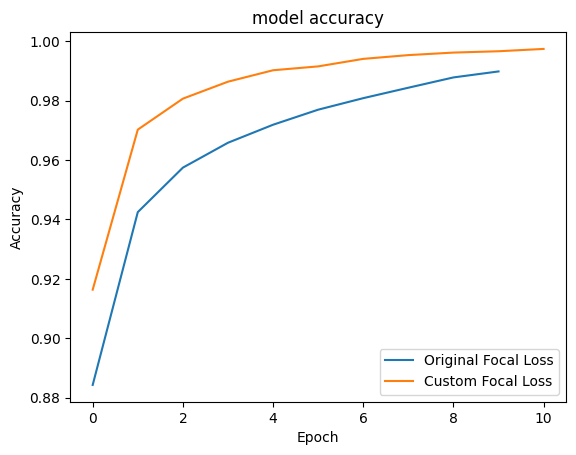

In [ ]:
plt.plot(history_prebuilt.history['accuracy'])
plt.plot(history_custom2.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Original Focal Loss', 'Custom Focal Loss'], loc='lower right')
plt.show()

## **THE OLD CODE USING TENSORFLOW DATASET DIRECTLY**

In [ ]:
#THE OLD CODE USING TENSORFLOW DATASET
import tensorflow as tf
import tensorflow_datasets as tfds

# Define the Focal Loss function
def focal_loss(y_true, y_pred, gamma=2.0, alpha=0.25):
    # Compute the binary cross-entropy loss
    binary_cross_entropy = tf.losses.binary_crossentropy(y_true, y_pred, from_logits=False)

    # Calculate the modulating factor
    p_t = tf.math.exp(-binary_cross_entropy)
    #Taking a similiar function to e^-x i.e, (e^-2x)
    #p_t = (tf.math.exp(2*(-binary_cross_entropy)))*(binary_cross_entropy)
    focal_loss = (alpha) * (1 - p_t) ** (gamma) * binary_cross_entropy
    #print(binary_cross_entropy)
    return focal_loss

# Load the MNIST dataset from go2ogle for handwritten digits recognisition
mnist = tfds.load("mnist", split="train", as_supervised=True)
mnist = mnist.map(lambda x, y: (tf.image.convert_image_dtype(x, tf.float32), tf.one_hot(y, depth=10)))
mnist = mnist.shuffle(buffer_size=60000).batch(64).prefetch(buffer_size=tf.data.AUTOTUNE)

# Define the model using relu activation function and softmax activation
#Softmax activation is commonly used for the output layer in multi-class classification tasks.
#Data set is digit recognisition
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compiling the model with the Focal Loss
model.compile(optimizer='adam', loss=focal_loss, metrics=['accuracy'])

# Training the model
model.fit(mnist, epochs=10)

# Evaluating the model
mnist_test = tfds.load('mnist', split="test", as_supervised=True)
mnist_test = mnist_test.map(lambda x, y: (tf.image.convert_image_dtype(x, tf.float32), tf.one_hot(y, depth=10)))
mnist_test = mnist_test.batch(64).prefetch(buffer_size=tf.data.AUTOTUNE)

loss, accuracy = model.evaluate(mnist_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")
if loss<0.1:
  print("Loss is very low tending to 0 and so is a good fit to the model")


Epoch 1/10
938/938 [==============================] - 10s 5ms/step - loss: 0.0012 - accuracy: 0.8830
Epoch 2/10
938/938 [==============================] - 5s 3ms/step - loss: 4.0375e-04 - accuracy: 0.9430
Epoch 3/10
938/938 [==============================] - 5s 3ms/step - loss: 2.7062e-04 - accuracy: 0.9577
Epoch 4/10
938/938 [==============================] - 6s 4ms/step - loss: 2.0006e-04 - accuracy: 0.9664
Epoch 5/10
938/938 [==============================] - 6s 4ms/step - loss: 1.5252e-04 - accuracy: 0.9727
Epoch 6/10
938/938 [==============================] - 6s 4ms/step - loss: 1.1994e-04 - accuracy: 0.9776
Epoch 7/10
938/938 [==============================] - 8s 6ms/step - loss: 9.8416e-05 - accuracy: 0.9811
Epoch 8/10
938/938 [==============================] - 6s 4ms/step - loss: 7.7362e-05 - accuracy: 0.9844
Epoch 9/10
938/938 [==============================] - 5s 3ms/step - loss: 6.6187e-05 - accuracy: 0.9872
Epoch 10/10
157/157 [==============================] - 1s 7ms/step 

In [ ]:
mnist

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>